## Prediction using Supervised Machine Learning 

In [1]:
# What will be predicted score if a student studies for 9.25 hrs/ day? 

In [1]:
# Importing the libraries
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
from scipy import stats
data= pandas.read_csv('D:\Files\Data Science\Anaconda\Sample csv files\GRIP tasks\Task- 1.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [2]:
# Summary of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [3]:
# Data cleaning
# Checking null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
# Checking duplicate values
data.duplicated().sum()

0

In [5]:
# Description of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Skewness in the data
data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

Slope of the linear model is : 9.776
Its intercept is : 2.484
Coefficient of correlation is :  0.976


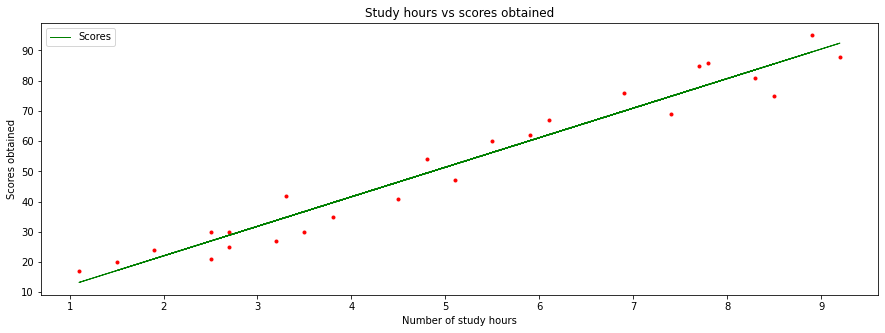

In [8]:
%matplotlib inline
x= data['Hours']
y= data['Scores']
slope, intercept, r, p, std_err = stats.linregress(x, y)
def my_function(x):
    return ((slope * x) + intercept)
model= list(map(my_function, x))
plt.figure( figsize= (15, 5))
plt.plot(x, model, label= 'Scores', color= 'green', linewidth= 1)
plt.xlabel('Number of study hours')
plt.ylabel('Scores obtained')
plt.title('Study hours vs scores obtained')
plt.scatter(x, y, marker= '.', color= 'red')
print('Slope of the linear model is :', slope.round(decimals= 3))
print('Its intercept is :', intercept.round(decimals= 3))
print('Coefficient of correlation is : ', r.round(decimals= 3))
plt.legend()
plt.show()

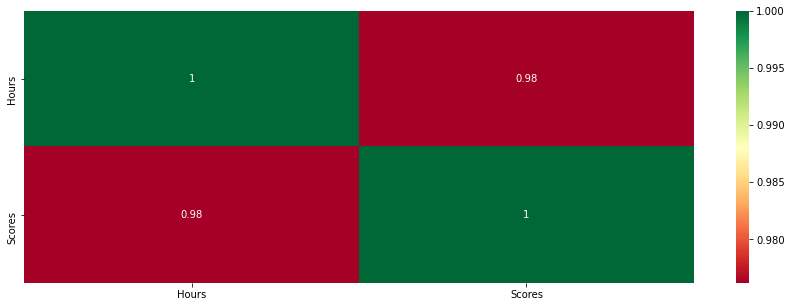

In [9]:
# Heatmap
correlation= data.corr()
plt.figure( figsize= (15, 5))
seaborn.heatmap(correlation,cmap= 'RdYlGn', annot= True)
plt.show()

In [10]:
# Shuffling the dataset
data= data.sample(frac=1)

In [11]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# Splitting data between independent and dependent variables and then into training and testing sets :  
# 95 % data in training set and 5 % data in testing set.
lr= LinearRegression()
x= data[['Hours']]
y= data[['Scores']]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.05, random_state= 1)
print('Training set shape is :',x_train.shape)
print('Testing set shape is :',x_test.shape)

Training set shape is : (23, 1)
Testing set shape is : (2, 1)


In [13]:
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print('r2 score is : ',r2_score(y_test, y_pred).round(decimals=3))
print('Mean absolute error is : ',mean_absolute_error(y_test, y_pred).round(decimals=3))
print('Mean squared error is : ',mean_squared_error(y_test, y_pred).round(decimals=3))
print('Root Mean squared error is : ',numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals=3))
print('Coefficient in the independent variable (Hours) is : ',lr.coef_.round(decimals=3))
print('Regression score is : ',lr.score(x_train, y_train).round(decimals=3))

r2 score is :  0.718
Mean absolute error is :  3.137
Mean squared error is :  11.899
Root Mean squared error is :  3.45
Coefficient in the independent variable (Hours) is :  [[9.918]]
Regression score is :  0.948


In [14]:
print('Target values in test set are : ', '\n', y_test)
print('Predicted values corresponding to it are : ', '\n', y_pred)

Target values in test set are :  
     Scores
14      17
20      30
Predicted values corresponding to it are :  
 [[12.42827867]
 [28.29771053]]


In [15]:
# Taking input values from user for prediction :
hours= float(input('Enter study hours for which you want to predict the scores : '))
prediction= lr.predict([[hours]])
# Taking output values from the model :
print('Prediction of scores obtained is :', int( prediction.round(decimals= 0)), 'marks.' )

Enter study hours for which you want to predict the scores : 9.25
Prediction of scores obtained is : 93 marks.


In [16]:
# Creating Joblib file
from joblib import dump, load
dump(lr, 'Task 1.joblib')

['Task 1.joblib']

In [17]:
# Loading our model
numpy.set_printoptions(suppress=True)
Task_1_model= load('Task 1.joblib')

In [18]:
# Taking input values from user :
hours= float(input('Enter study hours for which you want to predict the scores : '))

Enter study hours for which you want to predict the scores : 9.25


In [19]:
# Taking output from the model :
print('Entered input value is : ', hours, 'study hours.')
Prediction= Task_1_model.predict([[hours]])
print('Prediction of scores obtained is :', int(Prediction.round(decimals= 0)), 'marks.' )

Entered input value is :  9.25 study hours.
Prediction of scores obtained is : 93 marks.
